In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data1 = pd.read_csv('E:\\AUT\\Machine Learning\\PML_HW3\\DataSet\\4\\dataset1.csv')
data2 = pd.read_csv("E:\\AUT\\Machine Learning\\PML_HW3\\DataSet\\4\\dataset2.csv")
data3 = pd.read_csv("E:\\AUT\\Machine Learning\\PML_HW3\\DataSet\\4\\dataset3.csv")

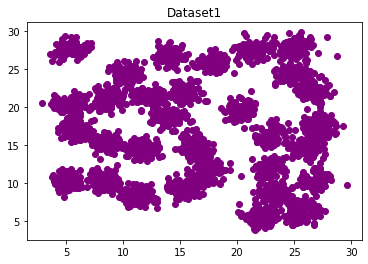

In [3]:
plt.scatter(data1['x'],data1['y'],color='purple')
plt.title("Dataset1")
plt.show()

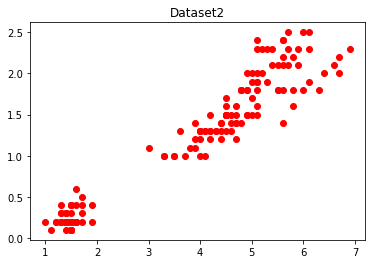

In [4]:
plt.scatter(data2['x'],data2['y'], color='red')
plt.title("Dataset2")
plt.show()

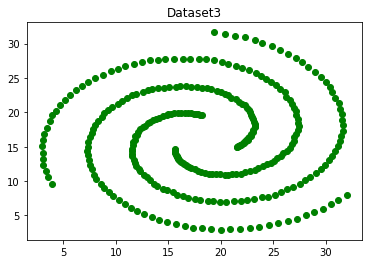

In [5]:
plt.scatter(data3['x'],data3['y'], color='green')
plt.title("Dataset3")
plt.show()

In [6]:
#Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_label = LabelEncoder()
data2.label= labelencoder_label.fit_transform(data2.label)
print(labelencoder_label.fit_transform(data2.label))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
X1=data1.copy()
X2=data2.copy()
X3=data3.copy()

In [8]:
from sklearn import preprocessing
X1_scaled=preprocessing.scale(X1)
X2_scaled=preprocessing.scale(X2)
X3_scaled=preprocessing.scale(X3)

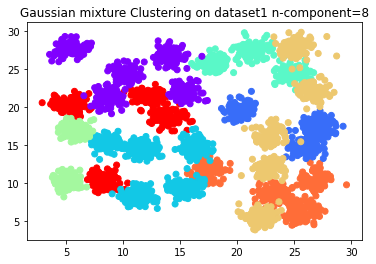

In [9]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=8)
gmm.fit(X1_scaled)
cluster_new=X1.copy()
cluster_new['cluster_pred']=gmm.fit_predict(X1_scaled)
plt.scatter(cluster_new['x'],cluster_new['y'],c=cluster_new['cluster_pred'],cmap='rainbow')
plt.title("Gaussian mixture Clustering on dataset1 n-component=8")
plt.show()

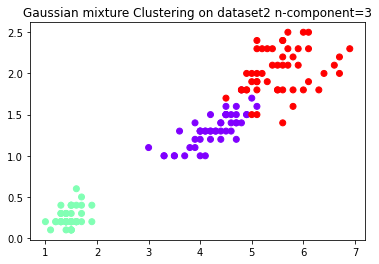

In [10]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(X2_scaled)
cluster_new=X2.copy()
cluster_new['cluster_pred']=gmm.fit_predict(X2_scaled)
plt.scatter(cluster_new['x'],cluster_new['y'],c=cluster_new['cluster_pred'],cmap='rainbow')
plt.title("Gaussian mixture Clustering on dataset2 n-component=3")
plt.show()

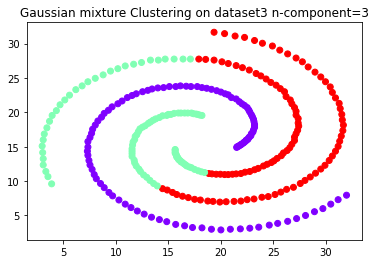

In [11]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(X3_scaled)
cluster_new=X3.copy()
cluster_new['cluster_pred']=gmm.fit_predict(X3_scaled)
plt.scatter(cluster_new['x'],cluster_new['y'],c=cluster_new['cluster_pred'],cmap='rainbow')
plt.title("Gaussian mixture Clustering on dataset3 n-component=3")
plt.show()

In [12]:
from sklearn import metrics
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

In [13]:
X1_df = data1.drop("label",axis = 1) #feature matrix
Y1_df = data1["label"] #Target vector
X1_df = np.array(X1_df)
Y1_df = np.array(Y1_df)
purity = 0

for k in range(1,10) :
    gmm = GaussianMixture(n_components=8)
    pred_y = gmm.fit_predict(X1_scaled)
    purity = purity_score(Y1_df, pred_y)
    purity=+purity
print(purity)  

0.25806451612903225


In [14]:
X2_df = data2.drop("label",axis = 1) #feature matrix
Y2_df = data2["label"] #Target vector
X2_df = np.array(X2_df)
Y2_df = np.array(Y2_df)
purity = 0

for k in range(1,10) :
    gmm = GaussianMixture(n_components=3)
    pred_y = gmm.fit_predict(X2_scaled)
    purity = purity_score(Y2_df, pred_y)
    purity=+purity
print(purity)  

1.0


In [15]:
X3_df = data3.drop("label",axis = 1) #feature matrix
Y3_df = data3["label"] #Target vector
X3_df = np.array(X3_df)
Y3_df = np.array(Y3_df)
purity = 0

for k in range(1,10) :
    gmm = GaussianMixture(n_components=3)
    pred_y = gmm.fit_predict(X3_scaled)
    purity = purity_score(Y3_df, pred_y)
    purity=+purity
print(purity)  

0.7019230769230769
